# Exploratory Data Analysis on over 230,000 songs on Spotify
Started: 10/07/2020

Purpose: 
- Explore the Spotify library dataset used in the initial project
- Find correlation between different variables
- Lower variables used for KMeans clustering for updated version of main project


In [1]:
import spotipy
import spotipy.util as util
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
library = pd.read_csv('SpotifyFeatures.csv')
library.describe()
library.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
genres = library['genre'].unique()

print(genres)

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


In [4]:
table_by_genres = pd.pivot_table(library, index = ['genre'])
table_by_genres

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
genre,,,,,,,,,,,
A Capella,0.829941,0.412252,204467.697479,0.250313,0.007491,0.136924,-13.660387,9.302521,0.042414,111.518950,0.328724
Alternative,0.162313,0.541898,233241.364245,0.711519,0.061303,0.196985,-6.540803,50.213430,0.088783,122.534485,0.449590
Anime,0.286843,0.472090,229937.067927,0.665356,0.280592,0.192391,-7.917802,24.258729,0.065102,126.629156,0.441682
Blues,0.327840,0.528232,251931.826000,0.606171,0.095175,0.233125,-9.053807,34.742879,0.061809,121.137637,0.579425
Children's Music,0.591781,0.697475,142726.774200,0.396880,0.143572,0.164894,-11.641760,4.252637,0.117279,121.131288,0.675956
Children’s Music,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,54.659040,0.086489,121.931104,0.449237
Classical,0.868843,0.305958,310339.983578,0.177984,0.599425,0.162810,-21.544477,29.282195,0.052001,104.341807,0.214463
Comedy,0.793098,0.559038,235305.210102,0.676094,0.000574,0.724775,-11.689321,21.342630,0.853532,98.235488,0.412764
Country,0.270172,0.577038,217237.527008,0.636318,0.005610,0.187216,-7.341693,46.100416,0.048989,123.414419,0.535160


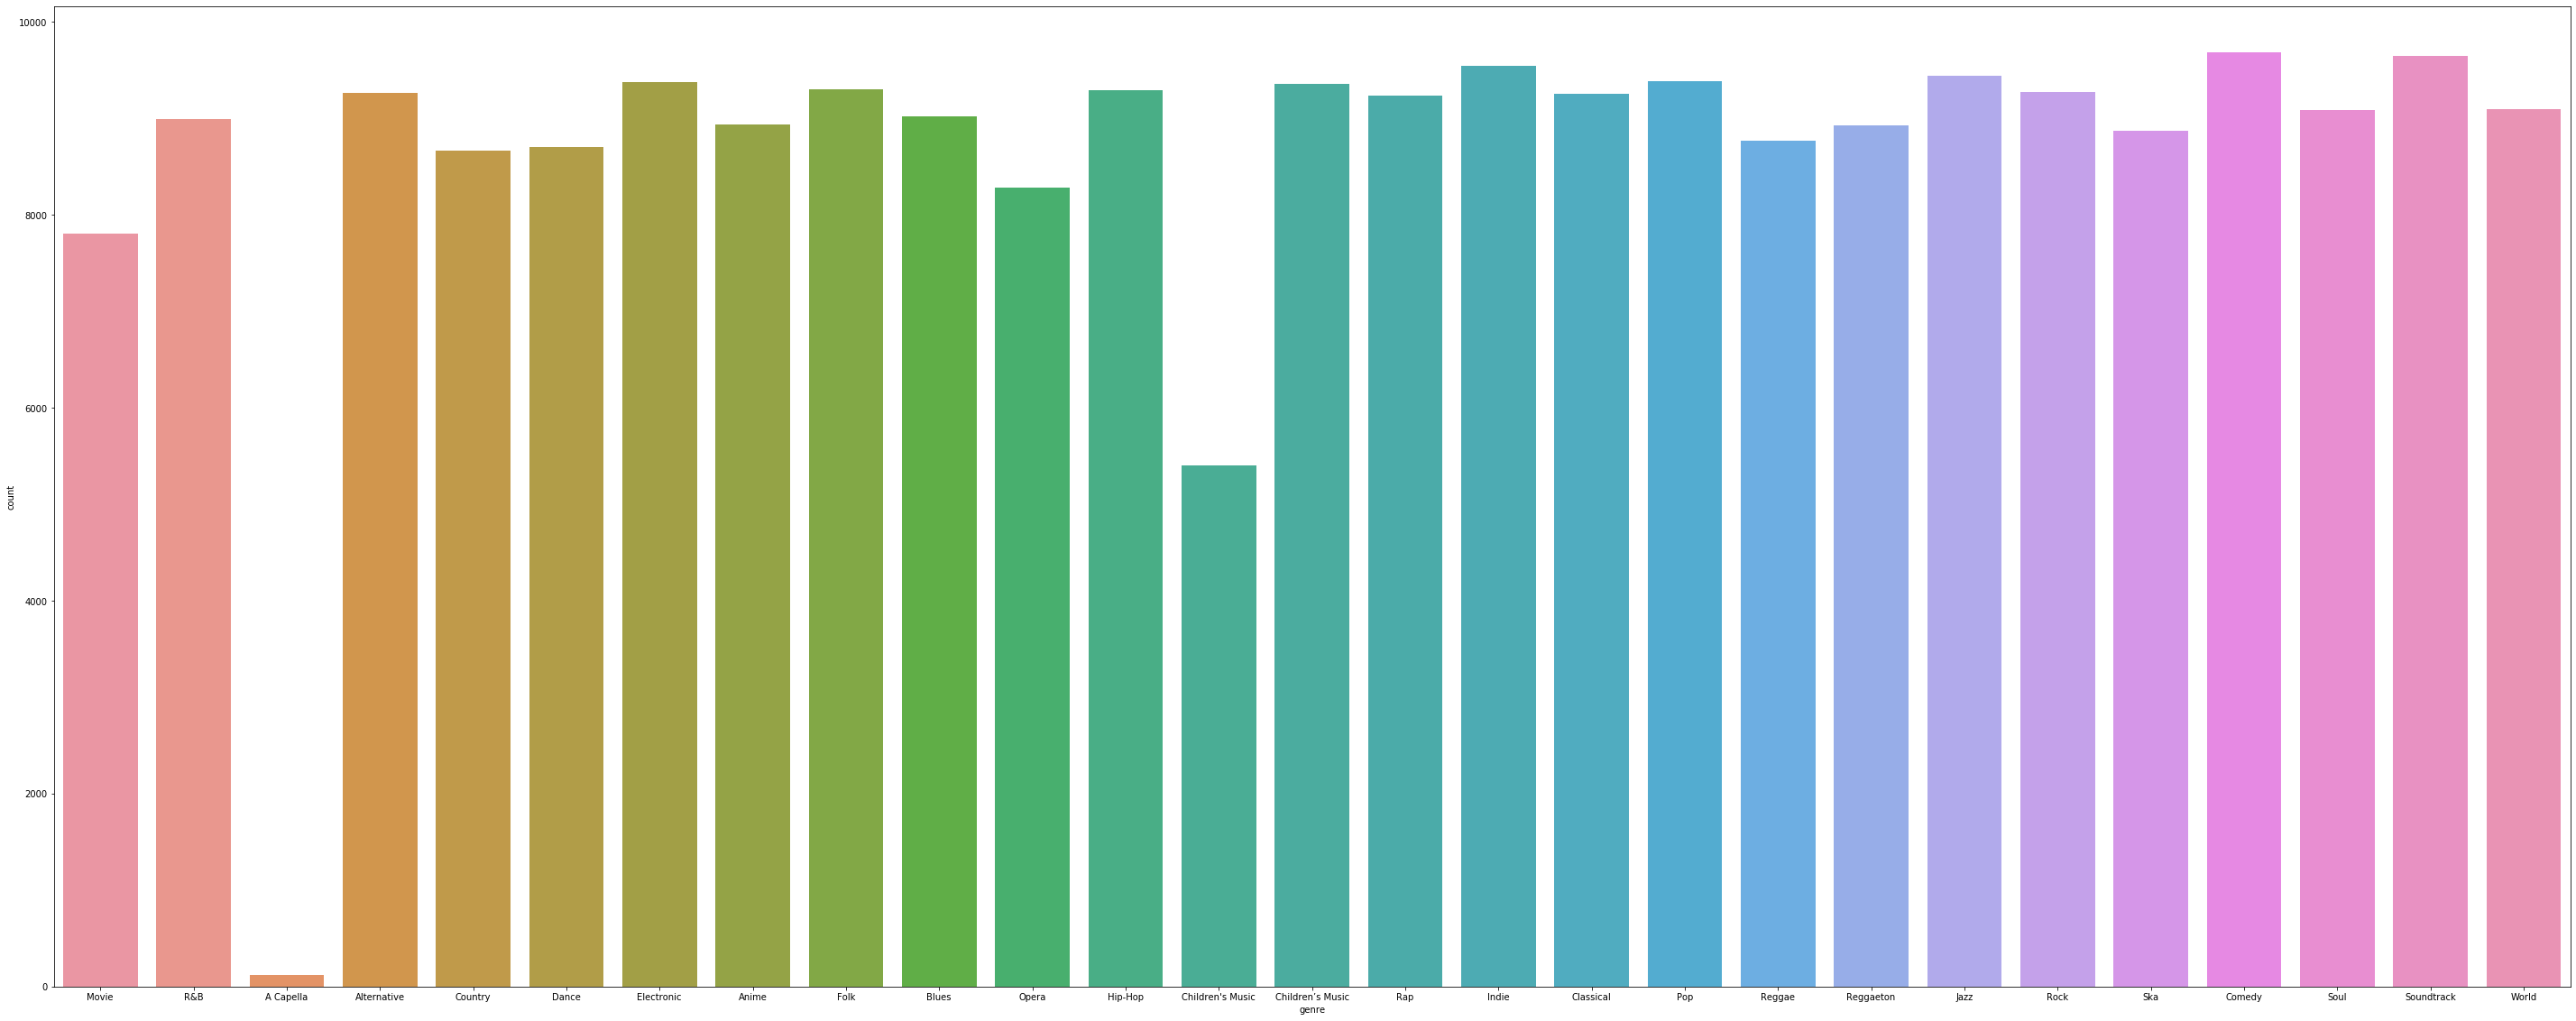

In [5]:
plt.figure(figsize = (50,20))
count_by_genre = ss.countplot(library['genre'])

<function matplotlib.pyplot.show(*args, **kw)>

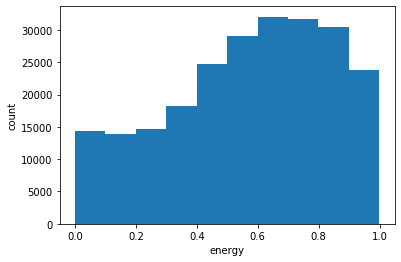

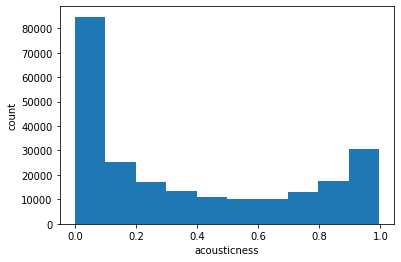

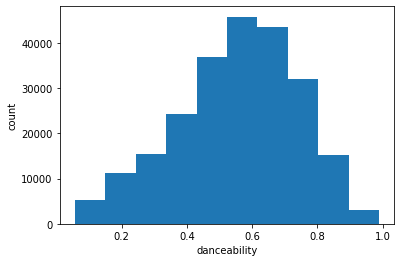

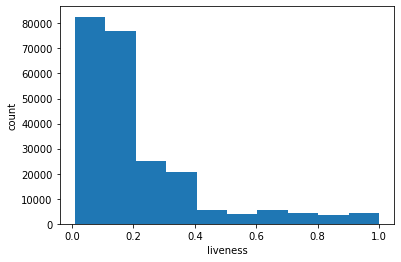

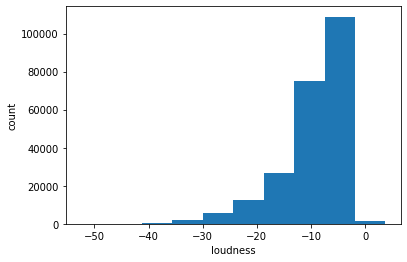

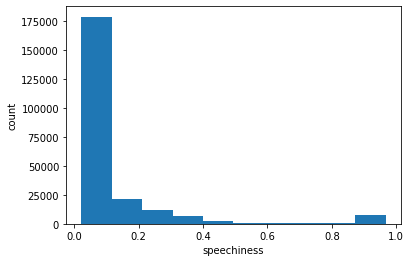

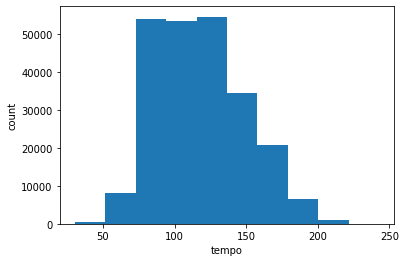

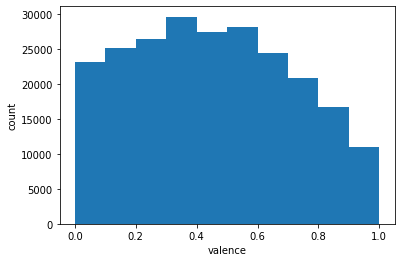

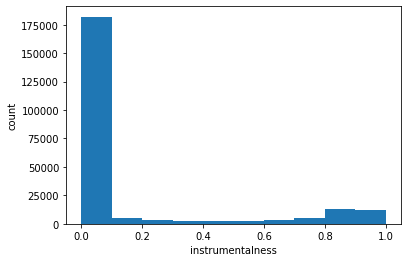

In [6]:
variables = ['energy', 'acousticness', 'danceability', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'instrumentalness']


for name in variables:
    plt.figure()
    plt.xlabel(name)
    plt.ylabel('count')
    plt.hist(library[name])

plt.show

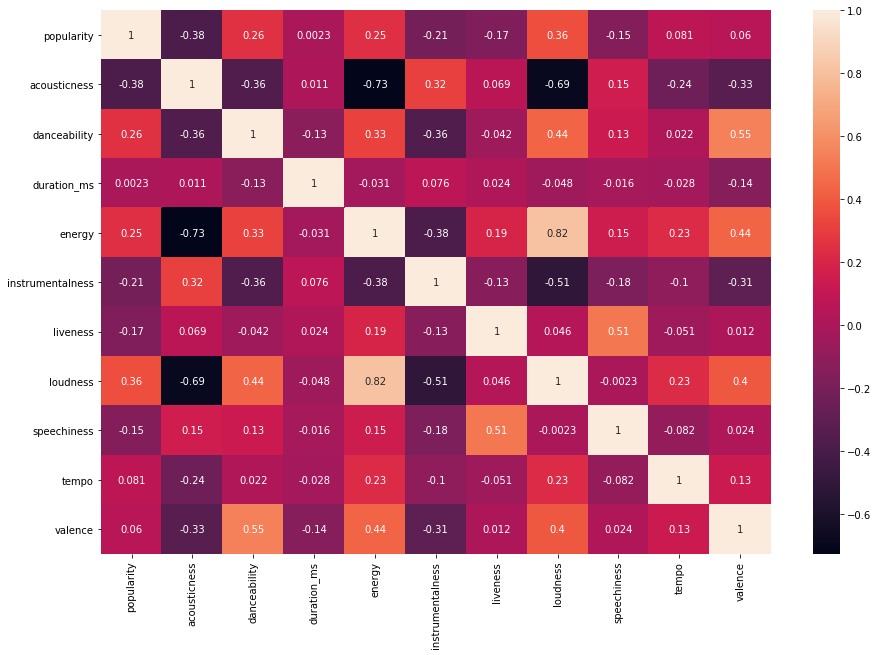

In [7]:
correlation = library.corr()

plt.figure(figsize = (15,10))
corr_chart = ss.heatmap(correlation, annot=True)
corr_chart

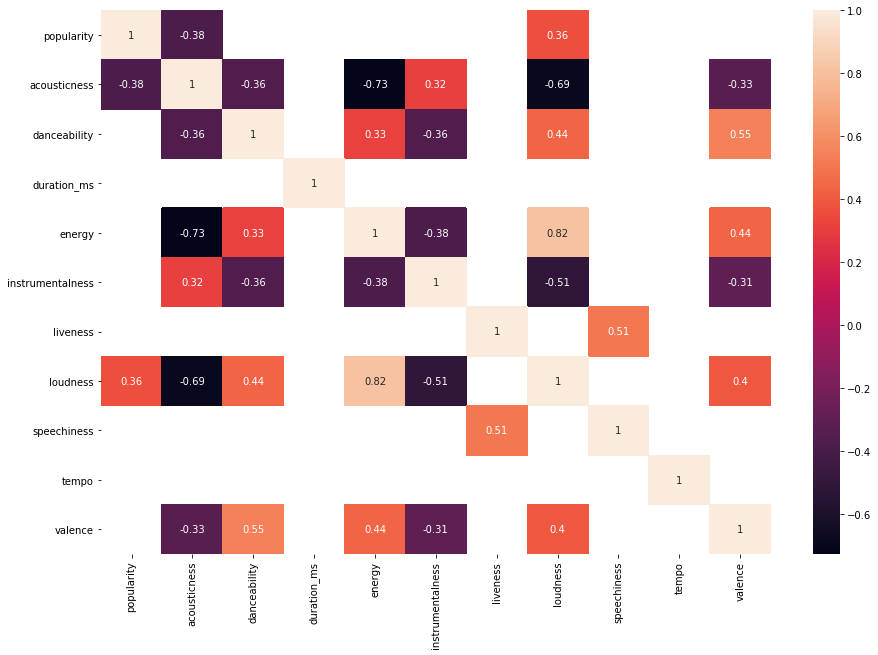

In [8]:
plt.figure(figsize = (15,10))
high_corr_chart = ss.heatmap(correlation[abs(correlation) > 0.3], annot = True)

Based on the high correlation chart above, I want to observe the following:
1. genre by average popularity
2. acousticness vs loudness on popularity
3. energy vs loudnesss vs dancability on valence
4. acousticness vs energy


In [9]:
pop_by_genres = pd.pivot_table(library, index = ['genre'], values = ['popularity'], aggfunc=['mean', 'median', 'count'])
pop_by_genres

,mean,median,count
,popularity,popularity,popularity
genre,,,
A Capella,9.302521,8,119
Alternative,50.213430,49,9263
Anime,24.258729,23,8936
Blues,34.742879,33,9023
Children's Music,4.252637,0,5403
Children’s Music,54.659040,54,9353
Classical,29.282195,32,9256
Comedy,21.342630,20,9681


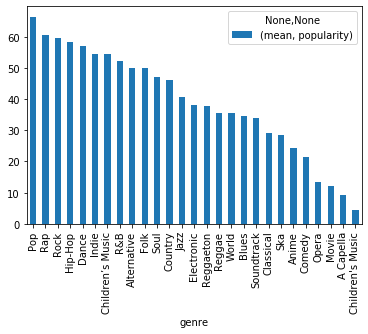

In [10]:
pop_by_genres_avg = pd.pivot_table(library, index = ['genre'], values = ['popularity'], aggfunc=['mean'])
pop_by_genres_avg.sort_values(by = ('mean', 'popularity'), ascending = False).plot.bar()

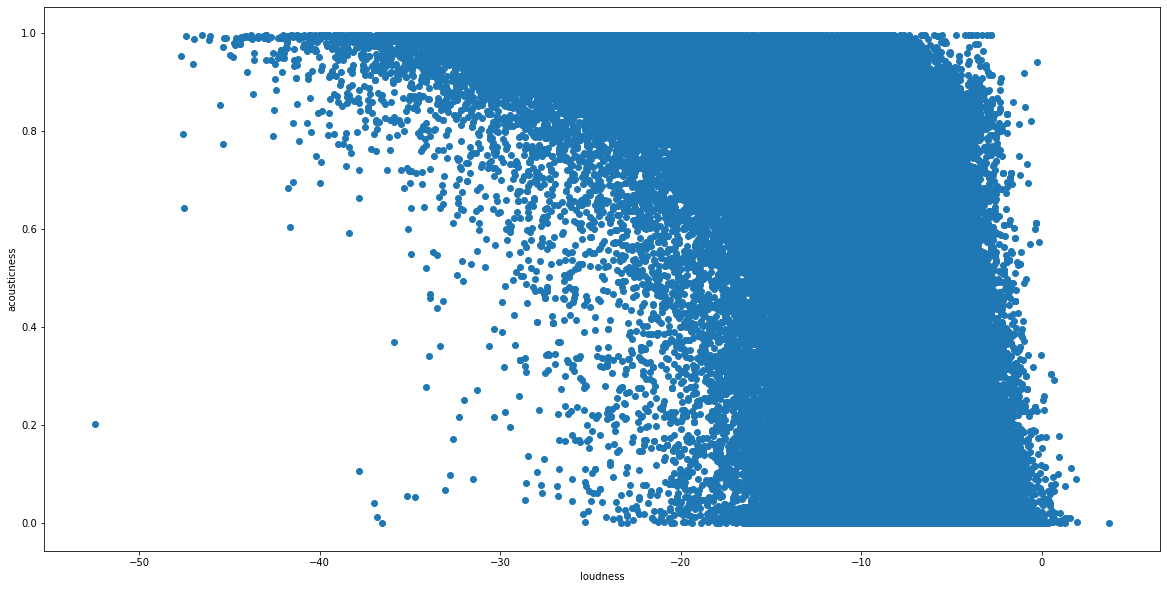

In [12]:
plt.figure(figsize=(20,10))
plt.xlabel('loudness')
plt.ylabel('acousticness')
plt.scatter(library['loudness'], library['acousticness'])

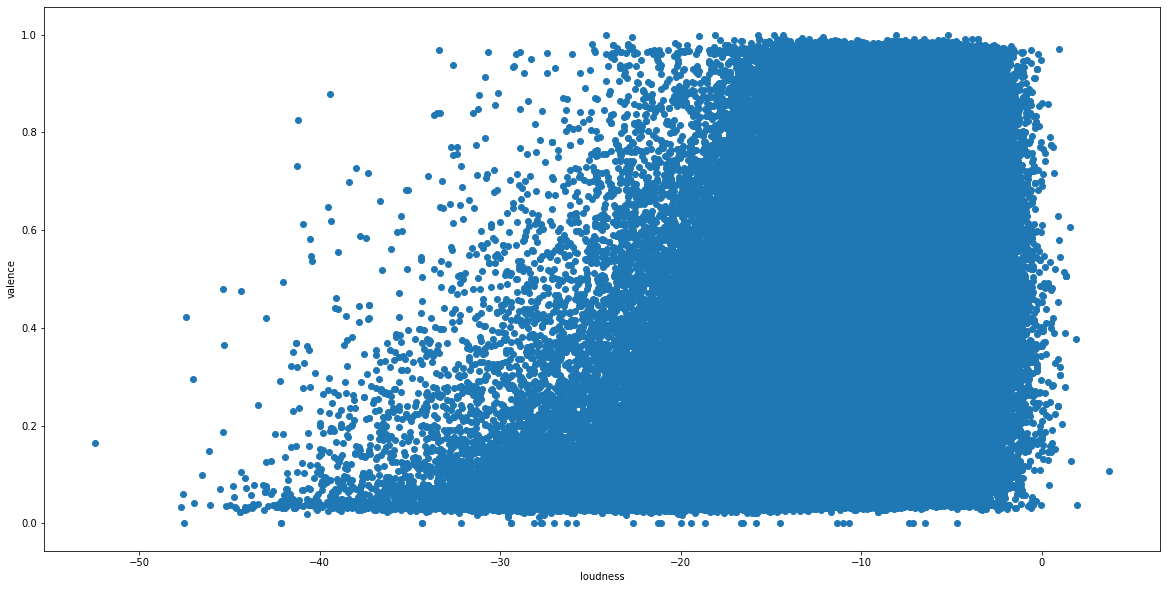

In [13]:
plt.figure(figsize=(20,10))
plt.xlabel('loudness')
plt.ylabel('valence')
plt.scatter(library['loudness'], library['valence'])

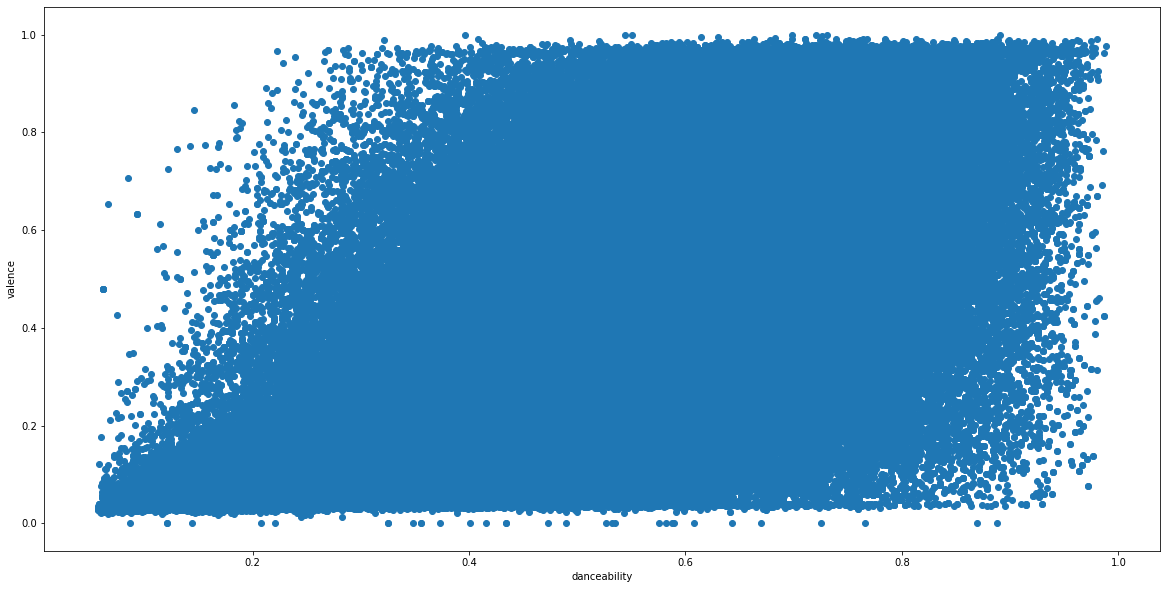

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel('danceability')
plt.ylabel('valence')
plt.scatter(library['danceability'], library['valence'])

# Exploratory Data Analysis on My Top Tracks (based on last month's listening history - different from the table shown in the initial Jupyter Notebook)

In [27]:
def user_top_tracks(limit):
    top_tracks = sp.current_user_top_tracks(limit=limit, time_range = 'short_term')
    top_tracks_df = pd.DataFrame(columns = ['rank','track_name','artist_name','release_date', 'track_id', 'popularity', 'time_signature','key','energy','acousticness','danceability', 'liveness','loudness','speechiness','tempo','valence'])   
    for i in range(limit):
        rank = float(i+1)
        track_name = top_tracks['items'][i]['name']
        track_id = top_tracks['items'][i]['id']
        track_release = top_tracks['items'][i]['album']['release_date']
        track_pop = top_tracks['items'][i]['popularity']
        track_artist = top_tracks['items'][i]['artists'][0]['name']
        audio = sp.audio_features(tracks=track_id)
        top_tracks_df = top_tracks_df.append({'rank': rank,
                                            'track_name': track_name, 
                                              'artist_name': track_artist,
                                  'release_date': track_release,
                                    'track_id': track_id, 
                                   'popularity': track_pop,
                                  'time_signature': audio[0]['time_signature'],
                                  'key': audio[0]['key'],
                                   'energy': audio[0]['energy'],
                                  'acousticness': audio[0]['acousticness'],
                                  'danceability': audio[0]['danceability'],
                                  'instrumentalness':audio[0]['instrumentalness'],
                                  'liveness':audio[0]['liveness'],
                                  'loudness': audio[0]['loudness'],
                                  'speechiness': audio[0]['speechiness'],
                                  'tempo': audio[0]['tempo'],                  
                                  'valence': audio[0]['valence']},
                                  ignore_index=True)
    return top_tracks_df
    
user_top_tracks = user_top_tracks(limit)

user_top_tracks.head(10)

,rank,track_name,artist_name,release_date,track_id,popularity,time_signature,key,energy,acousticness,danceability,liveness,loudness,speechiness,tempo,valence,instrumentalness
0,1.0,NITROUS,Joji,2020-09-25,1RTYj0DKungYDHtgFQRtmx,76,4,0,0.549,0.55600,0.827,0.1240,-8.188,0.0343,127.992,0.3810,0.689000
1,2.0,777,Joji,2020-09-25,6H167kbd8gY2Eewzf14YjD,76,4,1,0.604,0.26800,0.574,0.1390,-9.933,0.0863,179.636,0.1810,0.000003
2,3.0,Ew,Joji,2020-09-25,7xcUWyLh6fIMsYjoVI7NnZ,80,4,10,0.373,0.80400,0.480,0.1200,-9.297,0.0278,114.078,0.0376,0.067000
3,4.0,Pretty Boy (feat. Lil Yachty),Joji,2020-09-25,0f1G5SHFoFC9lO03gHCGVS,78,4,6,0.776,0.16000,0.656,0.3720,-6.184,0.0672,156.049,0.6380,0.378000
4,5.0,No More (Prod. Zion.T),KIM YO HAN,2020-08-25,6UZPTH87iJRJEPpfQ0wIZy,56,4,9,0.563,0.21500,0.760,0.0795,-6.329,0.1980,159.966,0.7130,0.000000
5,6.0,Afterthought,Joji,2020-09-25,6zvqq50PL7io0rprbkrYc9,78,4,1,0.547,0.39800,0.668,0.0931,-8.024,0.0353,83.500,0.1920,0.076600
6,7.0,Gates to the Sun (POLLEN Singles),SahBabii,2020-09-16,6EG0w98d2S1u1copDAHDqP,65,4,4,0.459,0.38600,0.717,0.1430,-11.101,0.2360,143.948,0.3730,0.012300
7,8.0,Maniac,Conan Gray,2020-03-20,6KfoDhO4XUWSbnyKjNp9c4,84,4,8,0.639,0.00162,0.628,0.3540,-5.460,0.0435,108.045,0.4930,0.000000
8,9.0,Tick Tock,Joji,2020-09-25,5E7p95xh9Ul4vZp4LEoJwi,78,4,4,0.613,0.03990,0.781,0.0976,-5.582,0.0524,80.530,0.6130,0.007130
9,10.0,HELICOPTER,CLC,2020-09-02,2hJS7BdEaH9Jo8MeJujsHT,73,4,5,0.908,0.03230,0.666,0.3830,-2.819,0.0560,155.048,0.6550,0.000000


In [17]:
user_top_tracks.describe()


,rank,energy,acousticness,danceability,liveness,loudness,speechiness,tempo,valence,instrumentalness
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.634300,0.316807,0.63576,0.157286,-6.460600,0.100388,126.931720,0.449552,0.059613
std,14.57738,0.193124,0.288041,0.12554,0.108336,2.743166,0.095789,28.880972,0.229842,0.178823
min,1.00000,0.170000,0.001080,0.33100,0.041100,-13.658000,0.027800,66.454000,0.035800,0.000000
25%,13.25000,0.534250,0.059775,0.55200,0.099050,-8.152250,0.041725,107.236500,0.272750,0.000000
50%,25.50000,0.662000,0.206500,0.65700,0.117000,-6.774000,0.059450,124.678500,0.484500,0.000012
75%,37.75000,0.779750,0.520750,0.71850,0.157750,-4.423750,0.107250,150.056000,0.629500,0.005817
max,50.00000,0.959000,0.953000,0.83700,0.616000,-1.339000,0.461000,190.097000,0.919000,0.740000


<function matplotlib.pyplot.show(*args, **kw)>

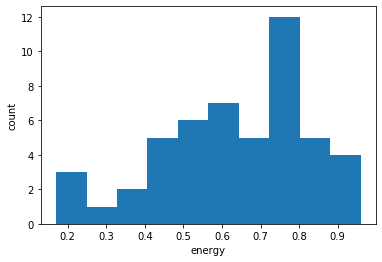

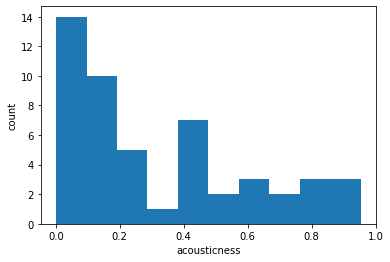

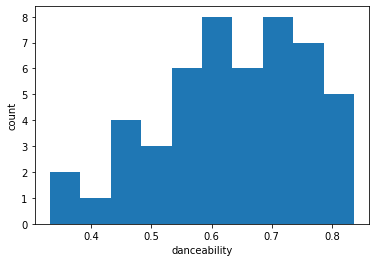

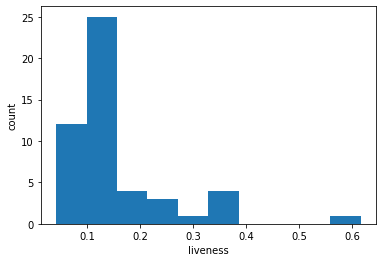

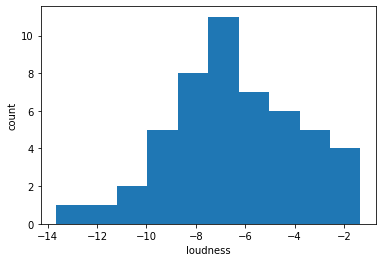

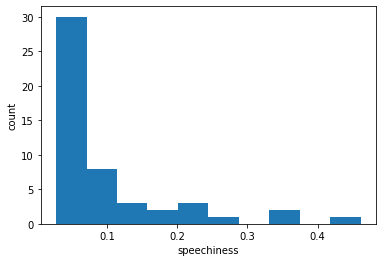

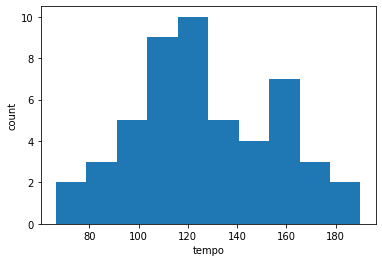

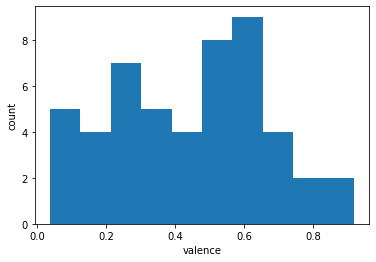

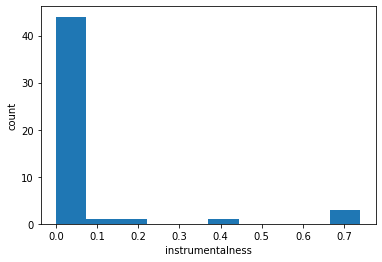

In [18]:
variables = ['energy', 'acousticness', 'danceability', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'instrumentalness']


for name in variables:
    plt.figure()
    plt.xlabel(name)
    plt.ylabel('count')
    plt.hist(user_top_tracks[name])

plt.show

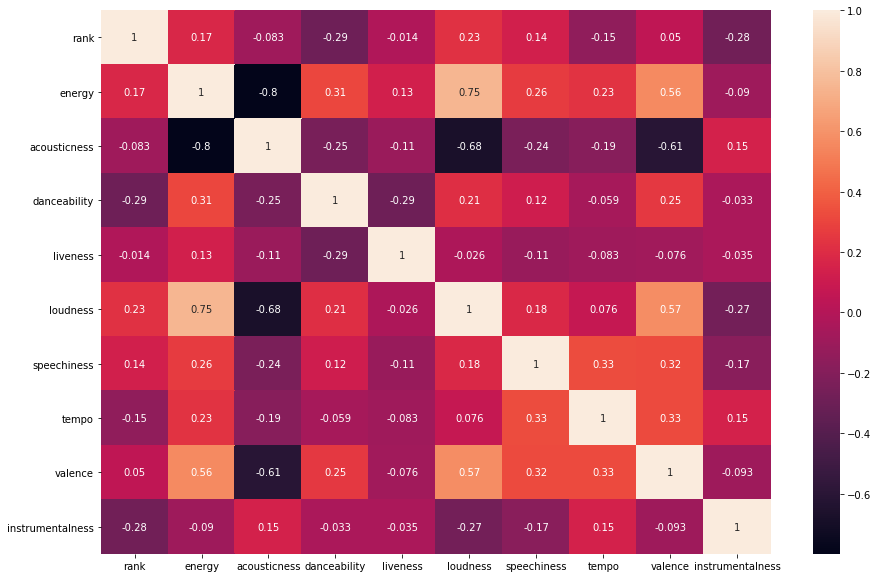

In [19]:
correlation = user_top_tracks.corr()

plt.figure(figsize = (15,10))
corr_chart = ss.heatmap(correlation, annot=True)
corr_chart

From the correlation chart above, I want to observe the following variables on rank: [Note: rank 1-most listened, 2-second most listened, and so on]:
1. loudness
2. danceability 
3. instrumentalness
4. energy
These variables will be used in the updated program for KMeans clustering

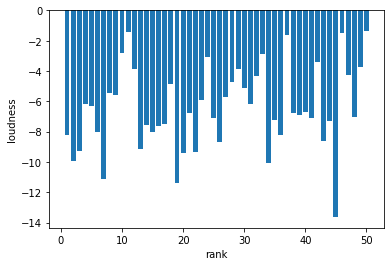

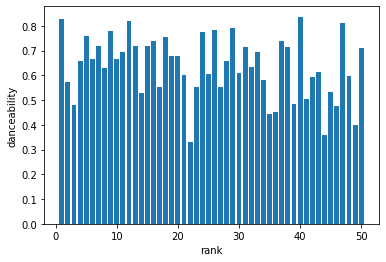

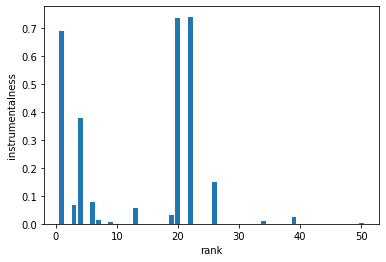

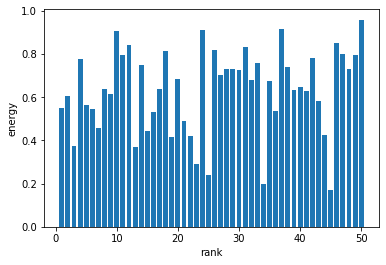

In [23]:
new_variables = ['loudness', 'danceability', 'instrumentalness', 'energy']

for name in new_variables:
    plt.figure()
    plt.xlabel('rank')
    plt.ylabel(name)
    plt.bar(user_top_tracks['rank'], user_top_tracks[name])